In [1]:
import requests
import time
from bs4 import BeautifulSoup
import pandas as pd

# URL of the page to scrape
url = "https://api.scrapingdog.com/scrape?api_key=657d045fa8510675fba81d9e&url=https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue&dynamic=false"


In [2]:
# Sending a request to the website
response = requests.get(url)
print(response.status_code)

200


In [3]:
# Parse the HTML snippet
soup = BeautifulSoup(response.text, 'html.parser')

In [4]:
tables = soup.find_all('table', class_='historical_data_table')
quarterly_revenue_table = None
for table in tables:
    if "Quarterly Revenue" in table.text:
        quarterly_revenue_table = table
        break

# Check if the table was found
if not quarterly_revenue_table:
    print("Quarterly Revenue table not found")
else:
    # Initialize a list to store the quarterly revenue data
    quarterly_revenue_data = []

    # Iterate over each row in the table body
    for row in quarterly_revenue_table.tbody.find_all('tr'):
        # Extract the date and revenue from each cell
        date_td, revenue_td = row.find_all('td')
        date = date_td.text.strip()
        revenue = revenue_td.text.strip()

        # Append the extracted data to the list
        quarterly_revenue_data.append({'date': date, 'revenue': revenue})

    # Display the extracted data
    for data in quarterly_revenue_data:
        print(f"Date: {data['date']}, Revenue: {data['revenue']}")


Date: 2023-09-30, Revenue: $23,350
Date: 2023-06-30, Revenue: $24,927
Date: 2023-03-31, Revenue: $23,329
Date: 2022-12-31, Revenue: $24,318
Date: 2022-09-30, Revenue: $21,454
Date: 2022-06-30, Revenue: $16,934
Date: 2022-03-31, Revenue: $18,756
Date: 2021-12-31, Revenue: $17,719
Date: 2021-09-30, Revenue: $13,757
Date: 2021-06-30, Revenue: $11,958
Date: 2021-03-31, Revenue: $10,389
Date: 2020-12-31, Revenue: $10,744
Date: 2020-09-30, Revenue: $8,771
Date: 2020-06-30, Revenue: $6,036
Date: 2020-03-31, Revenue: $5,985
Date: 2019-12-31, Revenue: $7,384
Date: 2019-09-30, Revenue: $6,303
Date: 2019-06-30, Revenue: $6,350
Date: 2019-03-31, Revenue: $4,541
Date: 2018-12-31, Revenue: $7,226
Date: 2018-09-30, Revenue: $6,824
Date: 2018-06-30, Revenue: $4,002
Date: 2018-03-31, Revenue: $3,409
Date: 2017-12-31, Revenue: $3,288
Date: 2017-09-30, Revenue: $2,985
Date: 2017-06-30, Revenue: $2,790
Date: 2017-03-31, Revenue: $2,696
Date: 2016-12-31, Revenue: $2,285
Date: 2016-09-30, Revenue: $2,298
Da

In [5]:
# Create a DataFrame
df = pd.DataFrame(quarterly_revenue_data)

# Display the DataFrame
print(df)

# If you want to save this DataFrame to a CSV file
df.to_csv('quarterly_revenue_data.csv', index=False)


          date  revenue
0   2023-09-30  $23,350
1   2023-06-30  $24,927
2   2023-03-31  $23,329
3   2022-12-31  $24,318
4   2022-09-30  $21,454
5   2022-06-30  $16,934
6   2022-03-31  $18,756
7   2021-12-31  $17,719
8   2021-09-30  $13,757
9   2021-06-30  $11,958
10  2021-03-31  $10,389
11  2020-12-31  $10,744
12  2020-09-30   $8,771
13  2020-06-30   $6,036
14  2020-03-31   $5,985
15  2019-12-31   $7,384
16  2019-09-30   $6,303
17  2019-06-30   $6,350
18  2019-03-31   $4,541
19  2018-12-31   $7,226
20  2018-09-30   $6,824
21  2018-06-30   $4,002
22  2018-03-31   $3,409
23  2017-12-31   $3,288
24  2017-09-30   $2,985
25  2017-06-30   $2,790
26  2017-03-31   $2,696
27  2016-12-31   $2,285
28  2016-09-30   $2,298
29  2016-06-30   $1,270
30  2016-03-31   $1,147
31  2015-12-31   $1,214
32  2015-09-30     $937
33  2015-06-30     $955
34  2015-03-31     $940
35  2014-12-31     $957
36  2014-09-30     $852
37  2014-06-30     $769
38  2014-03-31     $621
39  2013-12-31     $615
40  2013-09-30  

In [19]:
df = df[df["revenue"] != ""]
df.head()

,date,revenue
0,2023-09-30,23350
1,2023-06-30,24927
2,2023-03-31,23329
3,2022-12-31,24318
4,2022-09-30,21454


In [20]:
import sqlite3

conn = sqlite3.connect('my_database.db')
conn

In [21]:
# Create a cursor object using the cursor() method
cursor = conn.cursor()

# Drop the table if it already exists
cursor.execute("""CREATE TABLE df (Date, Revenue)""")


In [22]:
tesla_tuples = list(df.to_records(index = False))
tesla_tuples[:5]

[('2023-09-30', '23350'),
 ('2023-06-30', '24927'),
 ('2023-03-31', '23329'),
 ('2022-12-31', '24318'),
 ('2022-09-30', '21454')]

In [26]:
cursor.executemany("INSERT INTO df VALUES (?,?)", tesla_tuples)
conn.commit()

In [27]:
for row in cursor.execute("SELECT * FROM df"):
    print(row)

('2023-09-30', '23350')
('2023-06-30', '24927')
('2023-03-31', '23329')
('2022-12-31', '24318')
('2022-09-30', '21454')
('2022-06-30', '16934')
('2022-03-31', '18756')
('2021-12-31', '17719')
('2021-09-30', '13757')
('2021-06-30', '11958')
('2021-03-31', '10389')
('2020-12-31', '10744')
('2020-09-30', '8771')
('2020-06-30', '6036')
('2020-03-31', '5985')
('2019-12-31', '7384')
('2019-09-30', '6303')
('2019-06-30', '6350')
('2019-03-31', '4541')
('2018-12-31', '7226')
('2018-09-30', '6824')
('2018-06-30', '4002')
('2018-03-31', '3409')
('2017-12-31', '3288')
('2017-09-30', '2985')
('2017-06-30', '2790')
('2017-03-31', '2696')
('2016-12-31', '2285')
('2016-09-30', '2298')
('2016-06-30', '1270')
('2016-03-31', '1147')
('2015-12-31', '1214')
('2015-09-30', '937')
('2015-06-30', '955')
('2015-03-31', '940')
('2014-12-31', '957')
('2014-09-30', '852')
('2014-06-30', '769')
('2014-03-31', '621')
('2013-12-31', '615')
('2013-09-30', '431')
('2013-06-30', '405')
('2013-03-31', '562')
('2012-12-

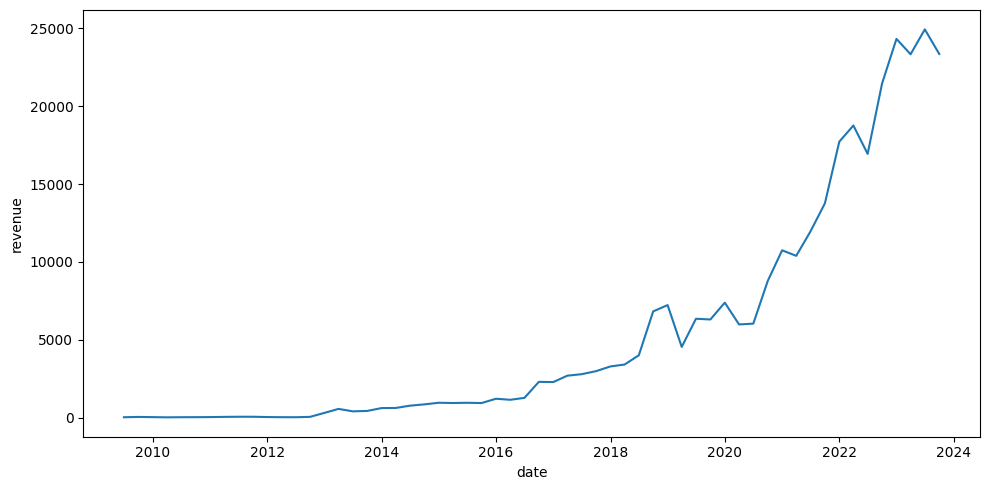

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(figsize = (10, 5))

df["date"] = pd.to_datetime(df["date"])
df["revenue"] = df["revenue"].astype('int')
sns.lineplot(data = df, x = "date", y = "revenue")

plt.tight_layout()

plt.show()

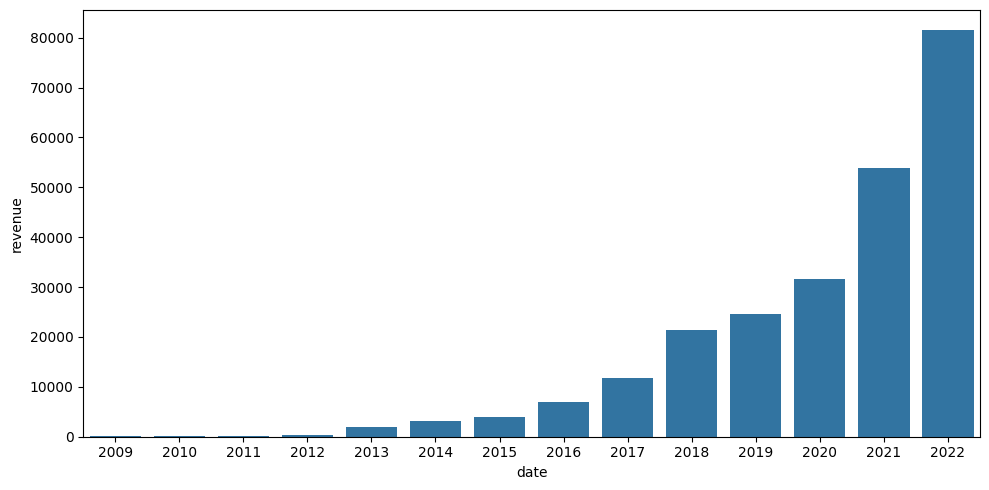

In [32]:
fig, axis = plt.subplots(figsize = (10, 5))

df["date"] = pd.to_datetime(df["date"])
tesla_revenue_yearly = df.groupby(df["date"].dt.year).sum().reset_index()

sns.barplot(data = tesla_revenue_yearly[tesla_revenue_yearly["date"] < 2023], x = "date", y = "revenue")

plt.tight_layout()

plt.show()

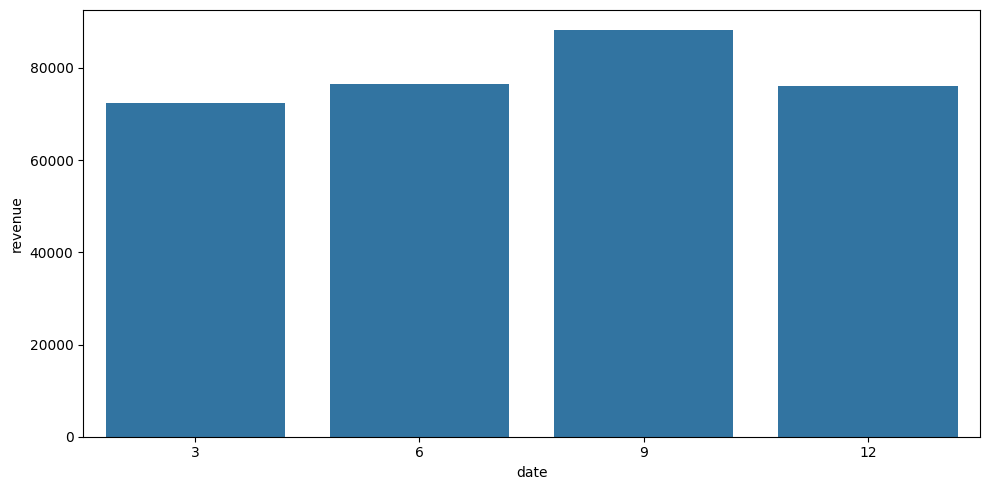

In [33]:
fig, axis = plt.subplots(figsize = (10, 5))

tesla_revenue_monthly = df.groupby(df["date"].dt.month).sum().reset_index()

sns.barplot(data = tesla_revenue_monthly, x = "date", y = "revenue")

plt.tight_layout()

plt.show()